## -  Fourier Transformation

In [1]:
# Importing Libraries
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
# Share information
r = 0.06
S0 = 100
sigma = 0.3

In [3]:
# Call option information
K = 110
T = 1
k_log = np.log(K)

In [4]:
# Analytical solution for Vanilla European Call
d_1_stock = (np.log(S0/K)+(r+sigma**2/2)*T)/(sigma*np.sqrt(T))
d_2_stock = d_1_stock - sigma*np.sqrt(T)

analytic_callprice = S0*norm.cdf(d_1_stock)-K*np.exp(-r*T)*norm.cdf(d_2_stock)
analytic_callprice

10.424100458714285

##### Let's now apply the Fourier methods we've covered

In [5]:
# Characteristic functions
def c_M1(t):
    return np.exp(1j*t*(np.log(S0)+(r-sigma**2/2)*T)-1/2*(sigma**2)*T*(t**2))

def c_M2(t):
    return np.exp(1j*t*(sigma**2)*T)*c_M1(t)

##### Because we cannot solve analytically the integral for the call price, we will approximate the value of the integral through the Riemann sum.

In [6]:
# Choose t_max and N
t_max = 20
N = 100

# Calculating delta and t_n
delta_t = t_max/N
from_1_to_N = np.linspace(1,N,N)
t_n = (from_1_to_N-1/2)*delta_t

In [11]:
c_M1(t_n)

array([ 8.94752495e-01+4.45554013e-01j,  1.82953680e-01+9.79010045e-01j,
       -6.66225166e-01+7.30681371e-01j, -9.74007090e-01-9.03795090e-02j,
       -5.07455668e-01-8.19867392e-01j,  3.42273774e-01-8.82988538e-01j,
        8.91450673e-01-2.53412874e-01j,  7.21025938e-01+5.44800954e-01j,
       -2.70160826e-04+8.78051486e-01j, -6.78537522e-01+5.12041445e-01j,
       -7.88612420e-01-2.24703613e-01j, -2.84411455e-01-7.35058830e-01j,
        3.97662191e-01-6.41597698e-01j,  7.17286608e-01-6.61128810e-02j,
        4.61163380e-01+5.06405746e-01j, -1.19596109e-01+6.37801247e-01j,
       -5.48536230e-01+2.72729855e-01j, -5.15656307e-01-2.57174101e-01j,
       -9.88827185e-02-5.30944079e-01j,  3.40053237e-01-3.72492184e-01j,
        4.67295253e-01+4.36510434e-02j,  2.28792267e-01+3.70155515e-01j,
       -1.45532143e-01+3.74755371e-01j, -3.56033501e-01+1.00972966e-01j,
       -2.70699636e-01-2.04800104e-01j,  2.86354226e-04-3.10227175e-01j,
        2.25609099e-01-1.70032499e-01j,  2.46484578

In [7]:
# Approximate integral estimates
first_integral = sum((((np.exp(-1j*t_n*k_log)*c_M2(t_n)).imag)/t_n)*delta_t)
second_integral = sum((((np.exp(-1j*t_n*k_log)*c_M1(t_n)).imag)/t_n)*delta_t)

In [8]:
first_integral

0.04047425779280077

In [9]:
second_integral

-0.33154831262580875

In [13]:
# Finnaly, the Fourier price for the Call option
fourier_call_val = S0*(1/2+first_integral/np.pi)-np.exp(-r*T)*K*(1/2+second_integral/np.pi)
fourier_call_val

10.424100443080057

## - Fourier-Cosine Expansion

##### Code for calculating the two functions: 
$\upsilon_n$, $\psi_n$

In [14]:
def upsilon_n(b2,b1,d,c,n):
    npi_d = np.pi*n*(d-b1)/(b2-b1)
    npi_c = np.pi*n*(c-b1)/(b2-b1)
    val_one = (np.cos(npi_d)*np.exp(d)-np.cos(npi_c)*np.exp(c))
    val_two = (n*np.pi*(np.sin(npi_d)*np.exp(d)-np.sin(npi_c)*np.exp(c))/(b2-b1))
    return (val_one+val_two)/(1+(n*np.pi/(b2-b1))**2)

def psi_n(b2,b1,d,c,n):
    if n==0:
        return d-c
    else:
        return (b2-b1)*(np.sin(n*np.pi*(d-b1)/(b2-b1))-np.sin(n*np.pi*(c-b1)/(b2-b1)))/(n*np.pi)

In [15]:
# Functions for call valuation
def v_n(K,b2,b1,n):
    return 2*K*(upsilon_n(b2,b1,b2,0,n) - psi_n(b2,b1,b2,0,n))/(b2-b1)

def logchar_func(u,S0,r,sigma,K,T):
    return np.exp(1j*u*(np.log(S0/K)+(r-sigma**2/2)*T)- ((sigma**2)*T*(u**2))/2)

def call_price(N,S0,sigma,r,K,T,b2,b1):
    price = v_n(K,b2,b1,0)*logchar_func(0,S0,r,sigma,K,T)/2
    for n in range(1,N):
        price = price + logchar_func(n*np.pi/(b2-b1), S0,r,sigma,K,T)*np.exp(-1j*n*np.pi*b1/(b2-b1))*v_n(K,b2,b1,n)
    return price.real*np.exp(-r*T)

In [18]:
# Define parameters for b1,b2,etc
c1 = r
c2 = T*sigma**2
c4 = 0
L = 10

b1 = c1-L*np.sqrt(c2-np.sqrt(c4))
b2 = c1+L*np.sqrt(c2-np.sqrt(c4))

NameError: name 'n' is not defined

In [20]:
# COS price for various N
COS_callprice = [None]*50

for i in range(1,51):
    COS_callprice[i-1]= call_price(i,S0,sigma,r,K,T,b2,b1)

In [21]:
COS_callprice[-1]

10.424100458714296

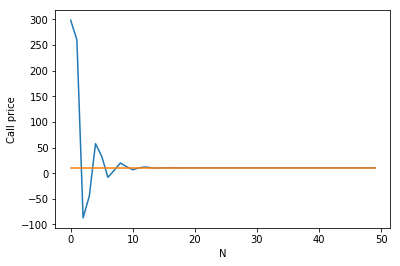

In [35]:
# Plot for different N's
plt.plot(COS_callprice)
plt.plot([analytic_callprice]*50)
plt.xlabel('N')
plt.ylabel('Call price')
plt.show()

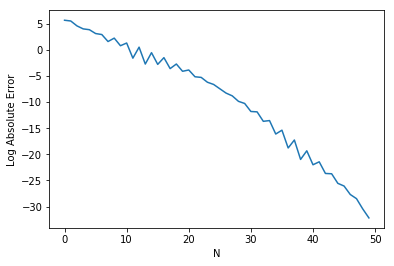

In [37]:
# Plot the Log of absolute error
plt.plot(np.log(np.absolute(COS_callprice - analytic_callprice)))
plt.xlabel('N')
plt.ylabel('Log Absolute Error')
plt.show()

In [39]:
one_call = call_price(30,S0,sigma,r,K,T,b2,b1)
one_call

10.424065670712778

## - The Cooley and Tukey (1999) Algorithm for Fast Fourier Transform (FFT)

In [65]:
def fft(x):
    N = len(x)
    if N==1:
        return x
    else:
        ek = fft(x[:-1:2])
        ok = fft(x[1::2])
        m = np.array(range(int(N/2)))
        okm = ok*np.exp(-1j*2*np.pi*m/N)
        return np.concatenate((ek+okm,ek-okm))

In [44]:
# Numpy also has a FFT function
np.fft.fft([1,3,4])

array([ 8. +0.j       , -2.5+0.8660254j, -2.5-0.8660254j])

## - Applying the FFT

In [107]:
# Libraries
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [108]:
# Share info
S0 = 100
sigma = 0.3
T = 1
r = 0.06

# Algorithm info
N = 2**10
delta = 0.25
alpha = 1.5

In [114]:
# Characteristic functions

def log_char(u):
    return np.exp(1j*u*(np.log(S0)+(r-sigma**2/2)*T)-sigma**2*T*u**2/2)

def c_func(v):
    val1 = np.exp(-r*T)*log_char(v-(alpha+1)*1j)
    val2 = alpha**2+alpha-v**2+1j*(2*alpha+1)*v
    return val1/val2

In [115]:
# Variables that we will need in the process

n = np.array(range(N))
delta_k = 2*np.pi/(N*delta)
b = delta_k*(N-1)/2

log_strike = np.linspace(-b,b,N)

###### Calculate $x_n$ values and get FFT

In [116]:
x = np.exp(1j*b*n*delta)*c_func(n*delta)*delta
x[0] = x[0]*0.5
x[-1] = x[-1]*0.5

xhat = fft(x).real

fft_call = np.exp(-alpha*log_strike)*xhat/np.pi
len(fft_call)

1024

In [117]:
# Black-Scholes price
d_1 = (np.log(S0/np.exp(log_strike))+(r+sigma**2/2)*T)/(sigma*np.sqrt(T))
d_2 = d_1 - sigma*np.sqrt(T)

bscall = S0*norm.cdf(d_1)-np.exp(log_strike)*np.exp(-r*T)*norm.cdf(d_2)
len(bscall)


1024

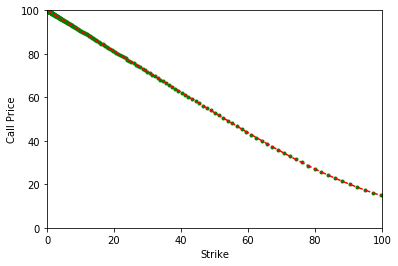

In [127]:
plt.plot(np.exp(log_strike), bscall,'g.') 
plt.plot(np.exp(log_strike), fft_call,'r--') 
plt.axis([0,100,0,100]) 
plt.xlabel("Strike")
plt.ylabel("Call Price")
plt.show()

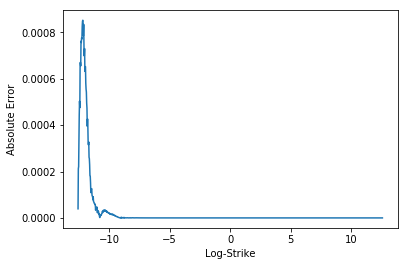

In [126]:
# Plot the Log of absolute error
plt.plot(log_strike, np.absolute(fft_call-bscall))
plt.xlabel("Log-Strike")
plt.ylabel("Absolute Error")
plt.show()